In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

We measure the voltage of a Photodiode as at different angles of the .... 
There seem to be inconsistencies regarding the laser, dropping considerably in intensity.

In [7]:
angles = np.array([20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 12.5, 11.5, 12.25,  12.35, 12.15, 
                   10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 359, 358, 357, 356, 355, 354, 353, 340, 345, 347, 
                   350, 351, 350.5, 350.25, 350.6, 350.35, 351.5, 352, 349, 348, 330,100, 200, 75,50,
                   150, 275, 230, 300, 320]) # degrees
voltage = np.array([10.60, 10.44, 10.44, 10.30, 10.41, 10.27, 10.5, 9.60, 4.42, 2.65, 8.91, 
                    3.32, 7.80, 7.83, 6.46, 1.85, 1.82, 1.80, 1.79, 1.75, 1.75, 1.72, 1.73, 
                    1.67, 1.67, 1.67, 1.64, 1.57, 1.52, 1.48, 1.47, 1.46, 1.43, 8.80, 8.67, 8.46, 8.21, 
                    2.84, 5.63, 7.85, 4.15, 7.09, 1.35, 1.10, 7.98, 7.72, 6.79, 1.5, 7.10, 0.75, 5.20,
                    6.01, 1.92, 3.50, 1.29, 3.95]) # mV
# correct sign
voltage = - voltage

# set up pandas dataframe for storing data/easy sorting
data = pd.DataFrame()
data['angle'] = angles
data['voltage'] = voltage

# sort data by angle
data = data.sort_values(by='angle').reset_index(drop=True)
# wrap values above 180 to to negative, such that 359 equiv to -1
mask = data['angle'] > 180
data.loc[mask, 'angle'] = data.loc[mask, 'angle'] - 360
data


,angle,voltage
0,0.00,-1.67
1,1.00,-1.67
2,2.00,-1.67
3,3.00,-1.73
4,4.00,-1.72
5,5.00,-1.75
6,6.00,-1.75
7,7.00,-1.79
8,8.00,-1.80
9,9.00,-1.82


(-30.0, 30.0)

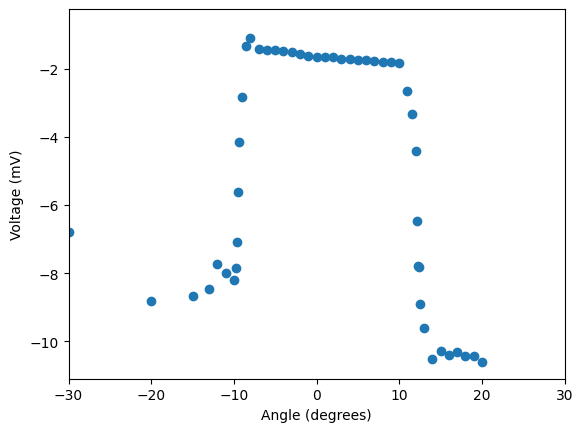

In [6]:
plt.scatter(data['angle'], data['voltage'])
plt.xlabel('Angle (degrees)')
plt.ylabel('Voltage (mV)')
plt.xlim(-30, 30)


In [ ]:
#we use Minuit package to fit a linear function to the measured signal
from iminuit import Minuit, cost

# looking at the first transition
mask1 = (data['angle'] > 9) & (data['angle'] < 15)

# continue with minuit somehow TODO
deg_fit = data["angle"][13:17]
u = data[[''][13:17]
sigma = np.ones_like(current_fit)
#since the measured signal has no uncertainties, we assume all residual to be equally weighted, therefore sigma_y = 1
# for all data point in the data set. 

def linear(x, t0,t1):
    return t1*x +t0

chi_2 = cost.LeastSquares(current_fit, u_fit, sigma, model = linear)
linear.errordef = Minuit.LEAST_SQUARES
minuit = Minuit(chi_2, t0=0, t1=0.58)
minuit.migrad()
minuit.minos()